In [106]:
# Imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics as m
from sklearn.model_selection import cross_val_score

In [117]:
# Load Data

data = pd.read_csv('C:\\Users\\RenanSardinha\\Documents\\Data Science\\CarPricesCardekho\\Data\\CAR DETAILS FROM CAR DEKHO.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [118]:
# EDA

data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

Text(0.5, 1.0, 'Fuel')

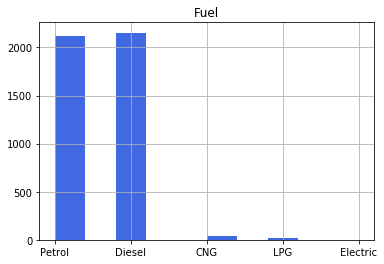

In [122]:
data['fuel'].hist(color='royalblue')
plt.title('Fuel')

Text(0.5, 1.0, 'Seller_type')

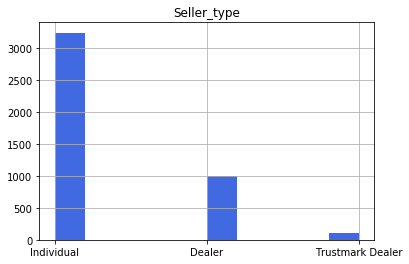

In [123]:
data['seller_type'].hist(color='royalblue')
plt.title('Seller_type')

Text(0.5, 1.0, 'Transmission')

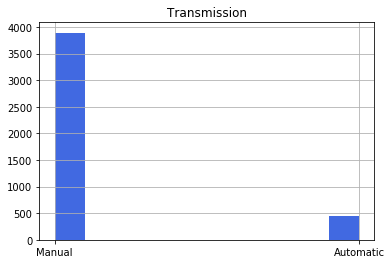

In [124]:
data['transmission'].hist(color='royalblue')
plt.title('Transmission')

Text(0.5, 1.0, 'Owner')

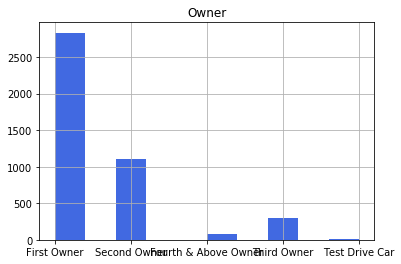

In [125]:
data['owner'].hist(color='royalblue')
plt.title('Owner')

In [4]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
data1 = data.iloc[:,1:8]
data1

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [6]:
data1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [24]:
data1['year'].mode()

0    2017
dtype: int64

In [25]:
data1['selling_price'].mode()

0    300000
dtype: int64

In [26]:
data1['km_driven'].mode()

0    70000
dtype: int64

In [27]:
data1['year'].var()

17.769124530168973

In [28]:
data1['selling_price'].var()

334718640087.9015

In [29]:
data1['km_driven'].var()

2175672269.4489436

In [30]:
data1.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [31]:
data1dummies = pd.get_dummies(data1)

In [32]:
data1dummies

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0


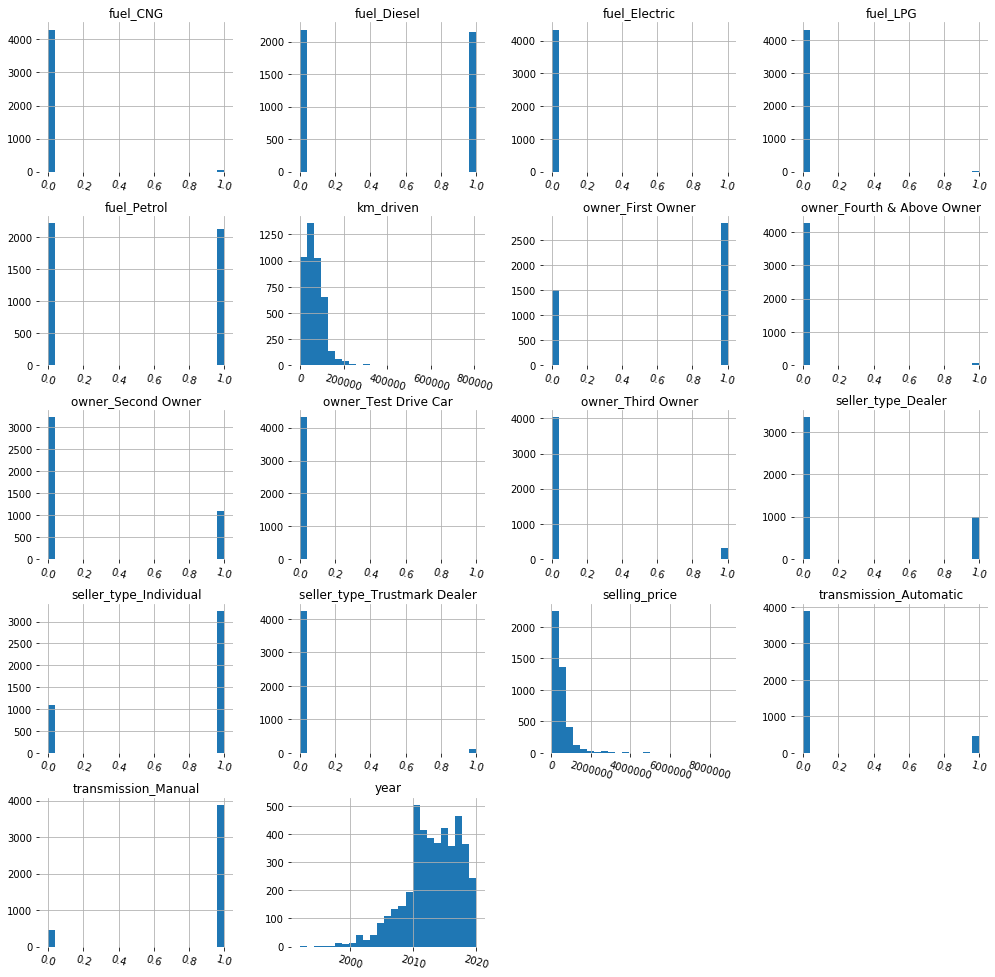

In [33]:
df1 = data1dummies[['year', 'selling_price', 'km_driven', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']]
h = df1.hist(bins=25, figsize=(17,17), xlabelsize = '10', ylabelsize = '10', xrot = -15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

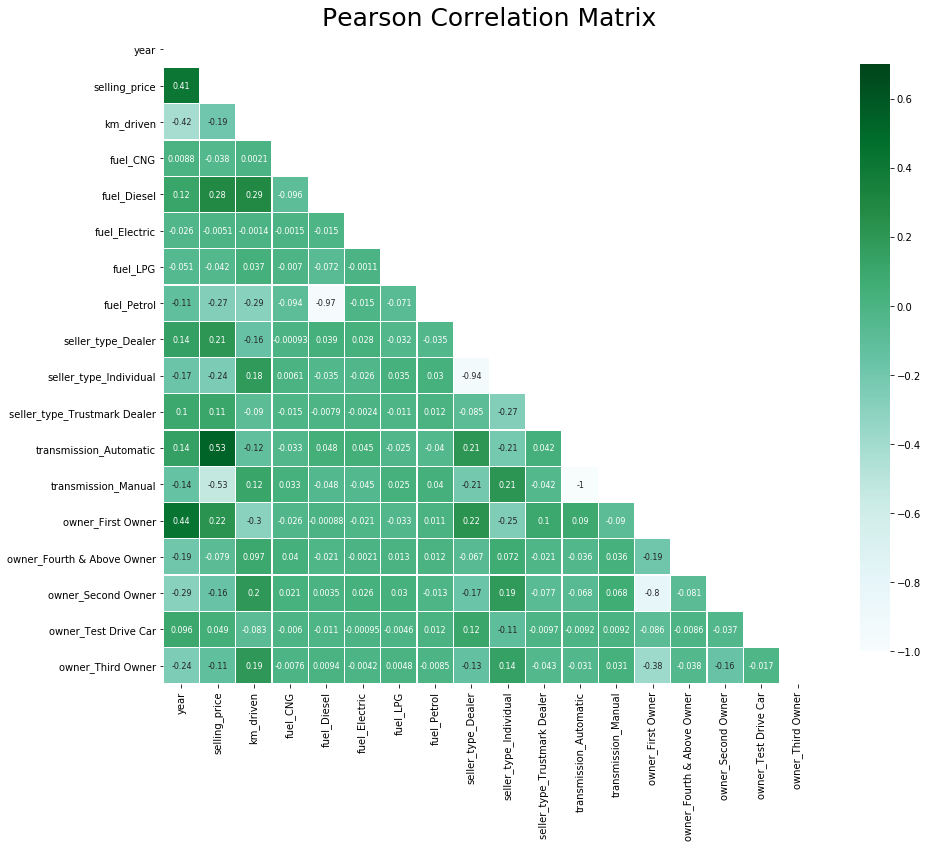

In [34]:
features = ['year', 'selling_price', 'km_driven', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']

mask = np.zeros_like(data1dummies[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data1dummies[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

In [35]:
# Separate the variables between predictors and target

x = data1dummies.drop(['selling_price'], axis=1)
y = data1dummies['selling_price']

In [37]:
x.shape

(4340, 17)

In [38]:
y.shape

(4340,)

In [39]:
# Create the training and test dataset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [42]:
# Model Training

model = LinearRegression()
model.fit(x_train,y_train)

In [53]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

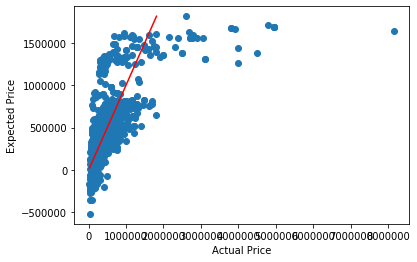

In [70]:
plt.scatter(y_test, pred_test)
range = [y_test.min(), pred_test.max()]
plt.plot(range, range, 'red')
plt.xlabel('Actual Price')
plt.ylabel('Expected Price')
plt.show()

In [55]:
# Performance Metrics
# Train - MAE, MAPE
mae_train = m.mean_absolute_error(y_train,pred_train)
mape_train = np.mean(np.abs((y_train - pred_train)/y_train))

# Test - MAE, MAPE
mae_test = m.mean_absolute_error(y_test, pred_test)
mape_test = np.mean(np.abs((y_test - pred_test)/y_test))

In [56]:
mae_train

227355.4600262068

In [58]:
mape_train

0.6869607913921507

In [61]:
mae_test

231374.2602447932

In [62]:
mape_test

0.702146625372304

In [63]:
data_result = {
    'Dataframe': ['training', 'test'],
    'MAE': [mae_train, mae_test],
    'MAPE': [mape_train, mape_test]}

pd.DataFrame(data_result)

,Dataframe,MAE,MAPE
0,training,227355.460026,0.686961
1,test,231374.260245,0.702147


In [66]:
# Cross Validation

result = cross_val_score(model,x_test,y_test, cv=10)
result.mean()

0.47645014555324494